Decision Tree

Dataset Head:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1 

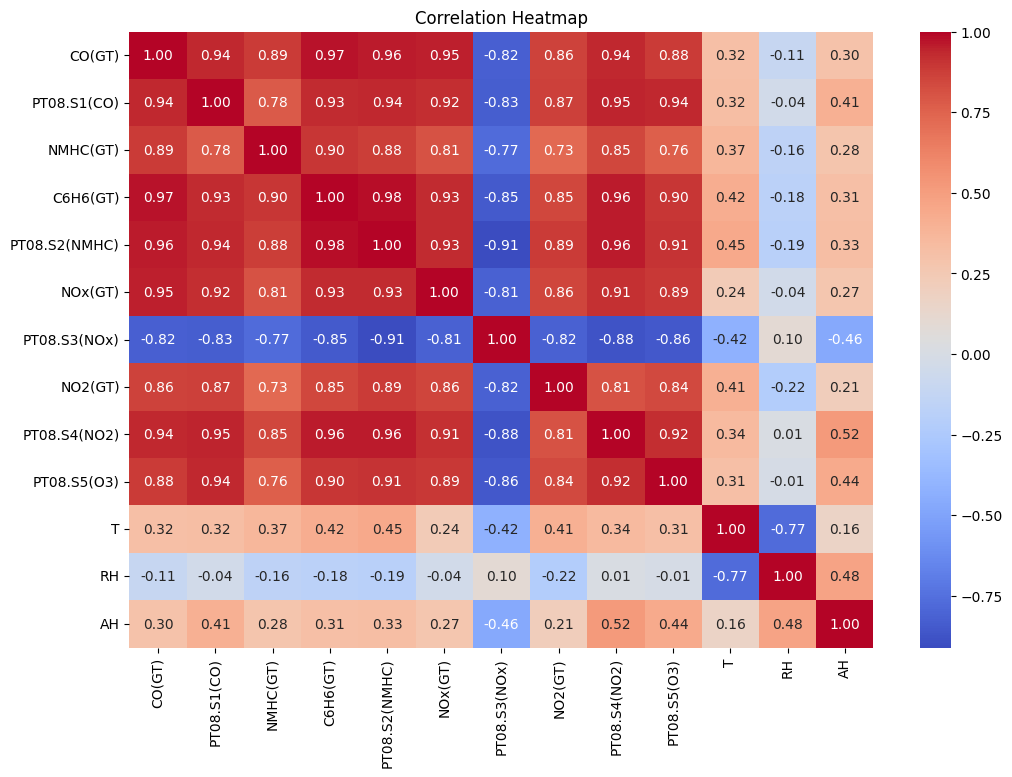

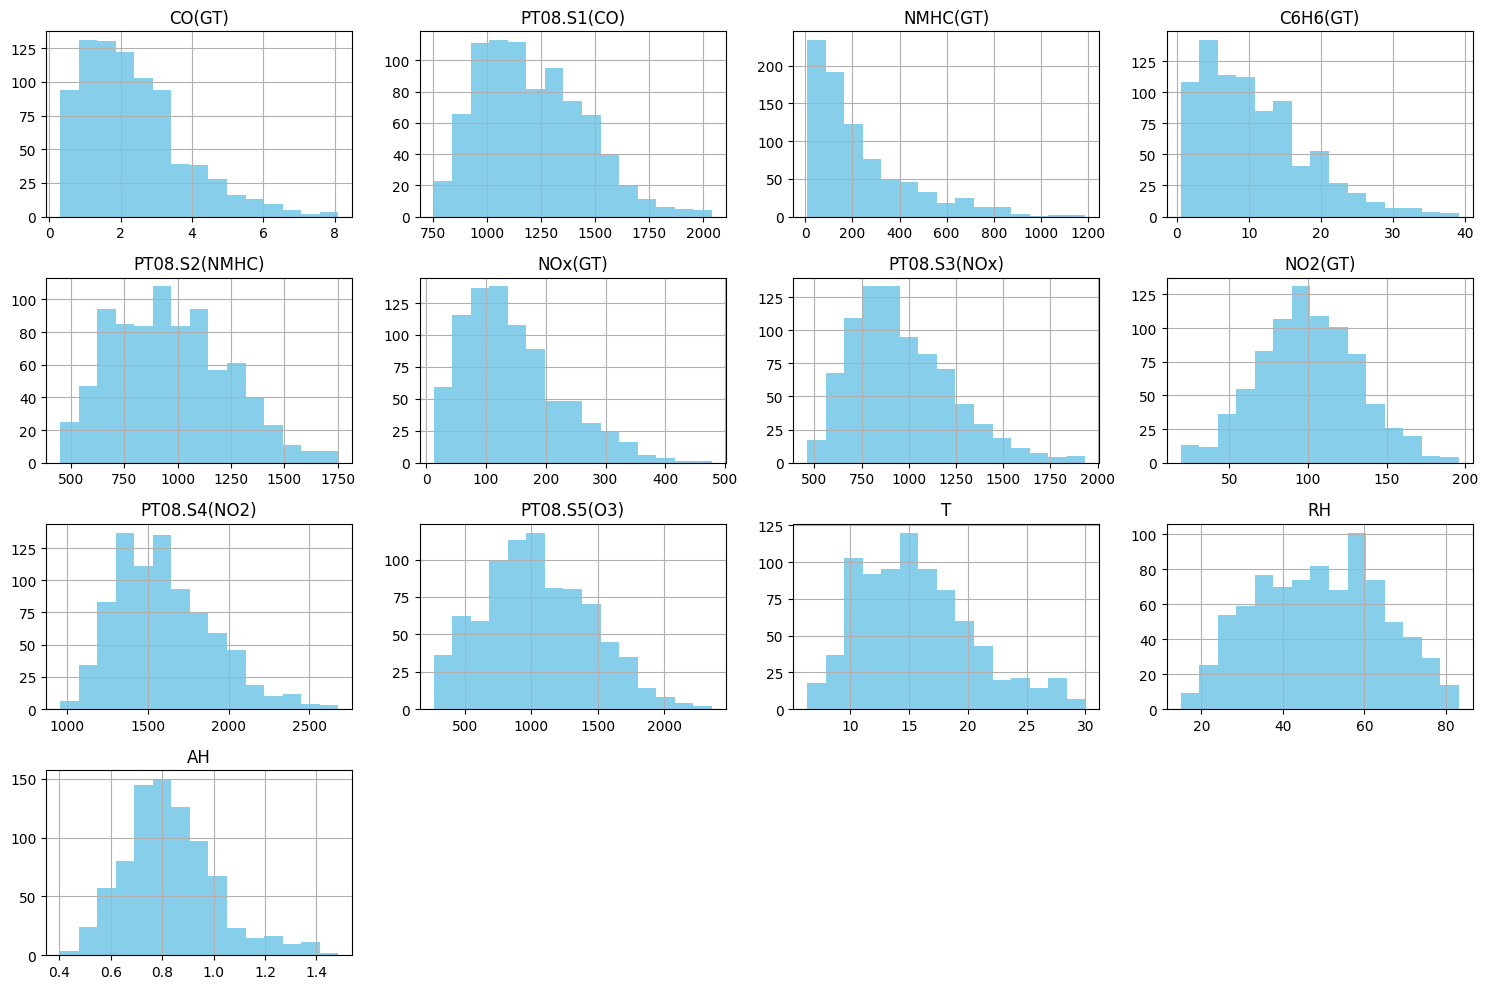

Decision Tree Performance:
Mean Squared Error (MSE): 201.0060
Mean Absolute Error (MAE): 10.3434
R2 Score: 0.8139


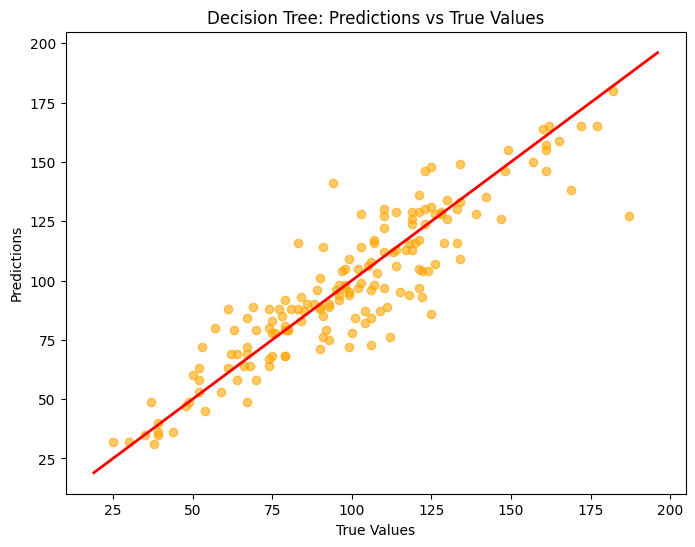

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 10663.0430 - mae: 98.4851 - val_loss: 11173.2529 - val_mae: 101.0845
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11035.1758 - mae: 100.0756 - val_loss: 11011.1846 - val_mae: 100.3119
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10425.7637 - mae: 97.2299 - val_loss: 10757.6719 - val_mae: 99.0959
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10477.1631 - mae: 97.6345 - val_loss: 10333.7930 - val_mae: 97.0189
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9945.5332 - mae: 94.8250 - val_loss: 9670.8389 - val_mae: 93.6130
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9209.6807 - mae: 91.2393 - val_loss: 8696.6855 - val_mae: 88.3093
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8248.7402 - mae: 85.4459 - val_loss: 7426.8135 - val_mae: 80.6792
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6451.6465 - mae: 74.9670 - val_loss: 5996.9434 - val_mae: 70.7

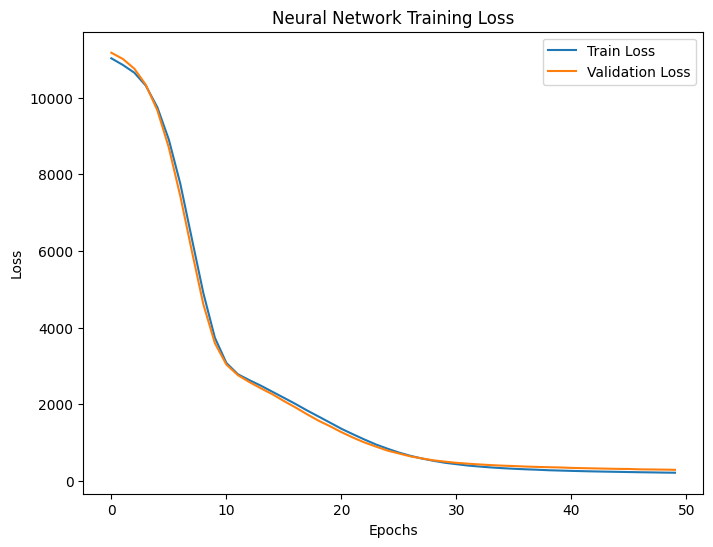

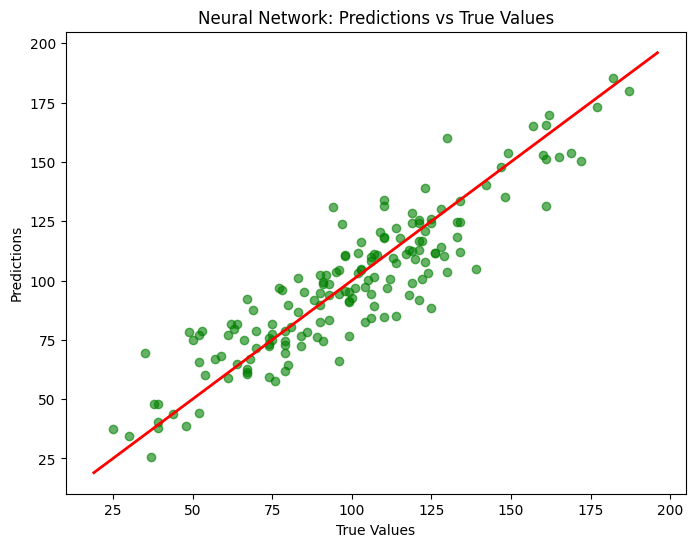

Model Comparison:
Decision Tree R2: 0.8139
Neural Network R2: 0.8189


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import zipfile  # Import zipfile module for zip file extraction

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
data_file = "AirQualityUCI.csv"

# Download and extract the zip file
import requests  # Requests is used to download the file from the URL
response = requests.get(url, stream=True)
with open("AirQualityUCI.zip", "wb") as f:
    f.write(response.content)
with zipfile.ZipFile("AirQualityUCI.zip", 'r') as zip_ref:
    zip_ref.extract(data_file)  # Extract the desired CSV file

# Load the dataset
df = pd.read_csv(data_file, sep=';', decimal=',', header=0, encoding='utf-8')

# Display first 5 rows
print("Dataset Head:")
print(df.head())

# Drop empty columns
df = df.iloc[:, :15]

# Drop unnecessary columns
df = df.drop(columns=['Date', 'Time'])

# Handle missing values (replace -200 with NaN)
df.replace(-200, np.nan, inplace=True)
df.dropna(inplace=True)

# Display dataset shape and info
print(f"Dataset shape after cleaning: {df.shape}")
print("Dataset Info:")
df.info()

# Heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Plot histograms of key variables
df.hist(bins=15, figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()

# Define the target (e.g., True NO2 concentration)
X = df.drop(columns=['NO2(GT)'])  # Features
y = df['NO2(GT)']                # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional for Decision Tree, mandatory for Neural Network)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_dt):.4f}")

# Scatter plot for predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.title("Decision Tree: Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Define Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Evaluation
print("Neural Network Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_nn):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_nn):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_nn):.4f}")

# Loss Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Scatter plot for predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.title("Neural Network: Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Compare the models
print("Model Comparison:")
print(f"Decision Tree R2: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Neural Network R2: {r2_score(y_test, y_pred_nn):.4f}")
